赫尔伯特·西蒙对“学习”的定义：如果一个系统能够通过执行某个过程改进它的性能，这就是学习。

统计学习就是计算机系统通过运用数据及统计方法提高系统性能的机器学习。

- 统计学习的对象：数据
统计学习关于数据的基本假设：同类数据具有一定的统计规律性。

监督学习假设输入与输出的随机变量$X$和$Y$遵循联合概率分布$P(X,Y)$。

- 统计学习的目的：考虑学习什么样的模型和如何学习模型，以使模型能对数据进行准确的预测与分析，同时也要考虑尽可能地提高学习效率。

- 统计学习的方法：监督学习、非监督学习、半监督学习、强化学习。

实现统计学习方法的步骤：
1. 得到一个有限的训练数据集合；
2. 确定包含所有可能的模型的假设空间，即学习模型的集合；
3. 确定模型选择的准则，即学习的策略；
4. 实现求解最优模型的算法，即学习的算法；
5. 通过学习方法选择最优模型；
6. 利用学习的最优模型对新数据进行预测或分析。

### 统计学习方法的三要素：模型、策略、算法

**损失函数**度量模型一次预测的好坏，**风险函数**度量平均意义下模型预测的好坏。

损失函数是预测值$f(X)$和真实值$Y$的非负实值函数，记作$L(Y,f(X))$。

- 0-1损失函数：$L(Y,f(X))=\left\{\begin{matrix}
1, Y\neq f(X))\\ 
0, Y=f(X))
\end{matrix}\right.$

- 平方损失函数：$L(Y,f(X))=(Y-f(X))^2$

- 绝对损失函数：$L(Y,f(X))=|Y-f(X)|$

- 对数损失函数：$L(Y,P(Y|X))-logP(Y|X)$

___
**经验风险$R_{emp}(f)$**：模型关于训练样本集的平均损失。
$$R_{emp}(f)=\frac{1}{N}\sum_{i=1}^NL(y_i,f(x_i))$$

**结构风险$R_{srm}(f)$**：为了防止过拟合而提出来的策略，其在经验风险上加上表示模型复杂度的正则化项。
$$R_{srm}(f)=\frac{1}{N}\sum_{i=1}^NL(y_i,f(x_i))+\lambda J(f)$$
其中，$J(f)$为模型的复杂度，$\lambda \geq 0$是系数，用以权衡经验风险和模型复杂度。

监督学习的两个基本策略：经验风险最小化、结构风险最小化。

_____________
#### 正则化
- **L-P范数**：
$$L_p=\sqrt[p]{\sum_1^nx_i^p},x=(x_1,x_2,\cdots,x_n)$$


1. **L0范数**：指向量中非0元素的个数。
2. **L1范数**：指向量中各个元素绝对值之和，也叫Lasso Regularization。
> 为什么稀疏的时候用L1而不要L0？
    - 1. L0范数很难优化求解
    - 2. L1范数是L0范数的最优凸近似，且比L0范数要容易优化求解。
    
- 参数稀疏的好处是什么？
    - 1. 能实现特征的自动选择，学习地去掉那些没有信息的特征，把这些特征对应的权重置为0。
    - 2. 使得模型更容易解释。例如数据x是1000维的，用回归模型进行分类学习，只有5个非零的$w_i$，有理由相信其对应的特征在分类上提供的信息是巨大的、决策性的。
    
3. **L2范数**：指向量各元素的平方和然后求平方根，也叫Ridge Regression、或weight decay，用于防止过拟合。
    - 1. 让L2范数的规则项$||w||_2$最小，可使得$w$的每个元素都很小，都接近于0.越小的参数说明模型越简单，越不容易产生过拟合现象。
    - 2. 有助于处理**condition number**不好的情况下矩阵求逆很困难的问题。
    - 3. 不但可以防止过拟合，还可以让我们的优化求解变得稳定和快速。

假设有方程组$AX=b$，需求解$X$。如果$A$或者%b%稍微的改变，会使得$X$的解发生很大的改变，那么这个方程组系统就是**ill-conditioned**的，反之就是**well-conditioned**的。而**condition number**就是拿来衡量**ill-conditioned**系统的可信度的，衡量输入发生微笑变化的时候，输出会发生多大的变化，即系统对微笑变化的敏感度。

如果方阵$A$是非奇异的，则$A$的condition number为：
$$k(A)=||A||\ ||A^{-1}||$$
- condition number是一个矩阵（或者所描述的线性系统）的稳定性或者敏感度的度量。如果一个矩阵的condition number在1附近，它就是well-conditioned；如果远大于1，就是ill-conditioned。
   

##### 参考链接
- https://blog.csdn.net/zouxy09/article/details/24971995
- https://blog.csdn.net/zouxy09/article/details/24972869
_____

### 模型评估与模型选择
**泛化能力**：学习方法对未知数据的预测能力。

**过拟合**：指学习时选择的模型所包含的参数过多，以致于出现这一模型对已知数据预测得很好，但对未知数据预测得很差的现象。

#### 正则化
正则化项一般是模型复杂度的单调递增函数，模型越复杂，正则化值就越大。如，正则化项可以是模型参数向量的范数。

- 作用：选择经验风险与模型复杂度同时较小的模型。

_____
#### 交叉验证
- 样本数据充足的情况下，随机地将数据集切分成三部分，分别为训练集、验证集和测试集。
- 样本数据不充足的情况下，需采用交叉验证方法，重复地使用数据，在此基础上反复地进行训练、测试以及模型选择。

##### 简单交叉验证
> 首先随机地将已给数据分为两部分，一部分作为训练集，另一部分作为测试集（30%）；然后用训练集在各种条件下训练模型，从而得到不同的模型；在测试集上评价各个模型的测试误差，选出测试误差最小的模型。

##### S折交叉验证
> 首先随机地将已给数据切分为S个互不相交的大小相同的子集；然后利用S-1个子集的数据训练模型，利用余下的子集测试模型；将这一过程对可能的S种选择重复进行；最后选出S次评测中平均测试误差最小的模型。
_____

#### 泛化能力
如果学到的模型是$\hat{f}$，用这个模型对未知数据预测的误差即为**泛化误差**。
$$R_{exp}(\hat{f})=E_p(L(Y,\hat{f}(X)))=\int L(Y,\hat{f}(X))P(x,y)dxdy$$
泛化误差就是所学习到的模型的期望风险。

**泛化误差上界**：对二类分类问题，当假设空间时有限个函数的集合$F=\{f_1,f_2,\cdots,f_d\}$时，对任意一个函数$f\in F$，至少以概率$1-\sigma$，以下不等式成立：
$$R{f}\leq \hat{R}(f)+\epsilon (d,N,\sigma)$$
其中，$\epsilon(d,N,\sigma) = \sqrt{\frac{1}{2N}(logd+log\frac{1}{\sigma})}$

_____
### 监督学习方法
#### 生成方法(generative approach)
> 由数据学习联合概率分布$P(X,Y)$，然后求出条件概率分布$P(Y|X)$作为预测的模型：
$$P(Y|X)=\frac{P(X,Y)}{P(X)}$$

包括：朴素贝叶斯模型、隐马尔科夫模型。

#### 判别方法(discriminative approach)
> 由数据直接学习决策函数$f(X)$或者条件概率分布$P(X|Y)$作为预测的模型。

包括：$k$近邻法、感知机、决策时、逻辑斯蒂回归模型、最大熵模型、支持向量机、提升方法、条件随机场。

### 评价分类器性能的指标
- 分类准确率(accuracy)
- 精确率(precision)
- 召回率(recall)

______________
#### 详细介绍ROC曲线、AUC值
- TP(True Positive)：实例是正类，且被预测为正类。
- FN(False Negative)：实例是正类，但被预测为负类。
- FP(False Positive)：实例是负类，但被预测为正类，相当于误报。
- TN(True Negative)：实例是负类，且被预测为负类。
    1. **TPR**(True Positive Rate)：真正类率，$\frac{TP}{TP+FN}$
    2. **FPR**(False Positive Rate)：负正类率，$\frac{FP}{FP+TN}$
    3. TNR(True Negative Rate)：真负类率，$\frac{TN}{FP+TN}$

假设采用逻辑回归分类器，其给出针对每个实例为正类的概率，通过设定一个阈值如0.6，概率大于0.6的为正类，小于0.6的为负类，对应就可以算出一组(FPR,TPR)。随着阈值不断的调整，即可得到ROC曲线。
> - 阈值最大为1时，对应坐标点为(0.0)，阈值最小为0时，对应坐标点(1,1)。
> - 理想目标：FPR=0, TPR=1，故ROC曲线越靠拢(0,1)点，越偏离45度对角线越好。
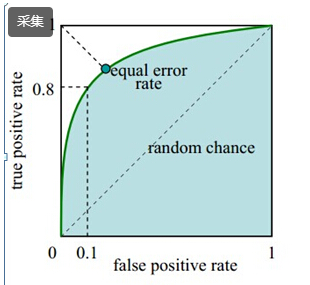

- **AUC**(Area under Curve)：ROC曲线下的面积。
> AUC作为数值可直观的评价分类器的好坏，值越大越好。

- 优点：当测试集中的正负样本的分布变换的时候，ROC曲线能够保持不变。如对于样本类不平衡的数据集。

#### 参考链接
- https://www.cnblogs.com/dlml/p/4403482.html
- https://blog.csdn.net/zouxy09/article/details/24971995